In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = r"C:\Users\rouat\Desktop\MMcows\Datasets\sensor_data\sensor_data\sub_data\head_direction\T01\T01_0725.csv"
df = pd.read_csv(file_path)


In [42]:
print(df.columns)


Index(['timestamp', 'roll', 'pitch', 'yaw', 'accel_norm', 'relative_angle'], dtype='object')


In [45]:
print(df.head())


      timestamp  roll  pitch    yaw  accel_norm  relative_angle
0  1.690261e+09 -80.8 -145.2  136.0       9.886           42.58
1  1.690261e+09 -82.4 -144.3  135.9       9.861           41.22
2  1.690261e+09 -81.5 -144.6  135.2       9.917           42.01
3  1.690261e+09 -81.7 -144.5  137.8       9.901           41.45
4  1.690261e+09 -81.0 -146.4  135.8       9.926           42.24


In [47]:
print(df.isnull().sum())


timestamp             0
roll              17680
pitch             17680
yaw               17728
accel_norm        17680
relative_angle    17728
dtype: int64


In [49]:
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")


Number of rows: 864000
Number of columns: 6


In [51]:
print("Timestamp range:")
print(f"Min: {df['timestamp'].min()}")
print(f"Max: {df['timestamp'].max()}")


Timestamp range:
Min: 1690261200.0
Max: 1690347599.8


In [53]:
import datetime

min_time = datetime.datetime.fromtimestamp(df['timestamp'].min())
max_time = datetime.datetime.fromtimestamp(df['timestamp'].max())

print(f"Datetime range: {min_time} to {max_time}")

Datetime range: 2023-07-25 06:00:00 to 2023-07-26 05:59:59.800000


In [55]:
print(df.describe())


          timestamp           roll          pitch            yaw  \
count  8.640000e+05  846320.000000  846320.000000  846272.000000   
mean   1.690304e+09     -35.449761     -20.512164      19.581080   
std    2.494150e+04      15.189129      31.048267      73.707629   
min    1.690261e+09     -89.300000    -210.000000    -161.600000   
25%    1.690283e+09     -44.800000     -40.700000     -26.900000   
50%    1.690304e+09     -37.600000     -16.800000      30.300000   
75%    1.690326e+09     -27.900000       2.100000      61.400000   
max    1.690348e+09      85.200000     149.900000     198.400000   

          accel_norm  relative_angle  
count  846320.000000   846272.000000  
mean        9.789517       23.131372  
std         0.615936       12.615126  
min         0.442000        0.040000  
25%         9.623000       16.360000  
50%         9.762000       22.100000  
75%         9.917000       27.420000  
max        33.891000      175.300000  


In [57]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 2


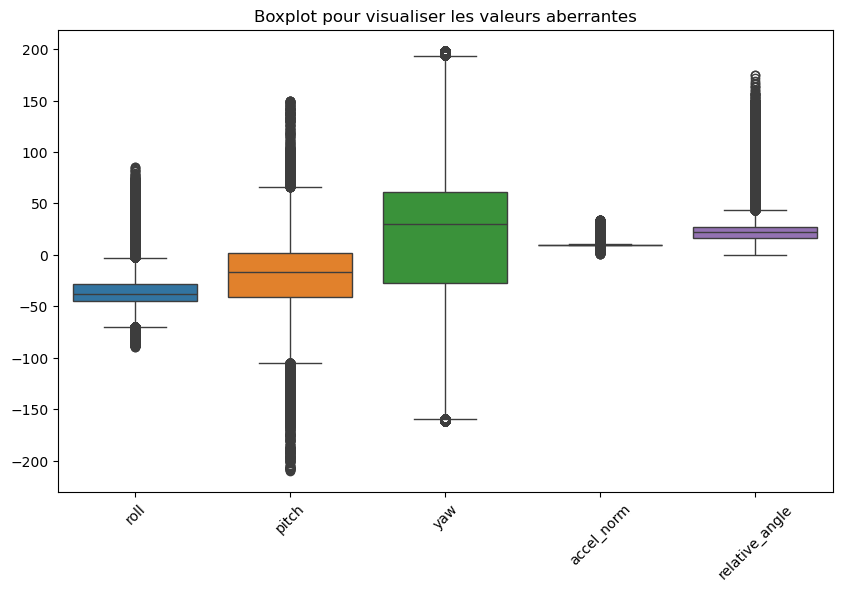

In [ ]:

cols_to_plot = ['roll', 'pitch', 'yaw', 'accel_norm', 'relative_angle']

# Tracer le boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[cols_to_plot])
plt.title('Boxplot pour visualiser les valeurs aberrantes')
plt.xticks(rotation=45)
plt.show()

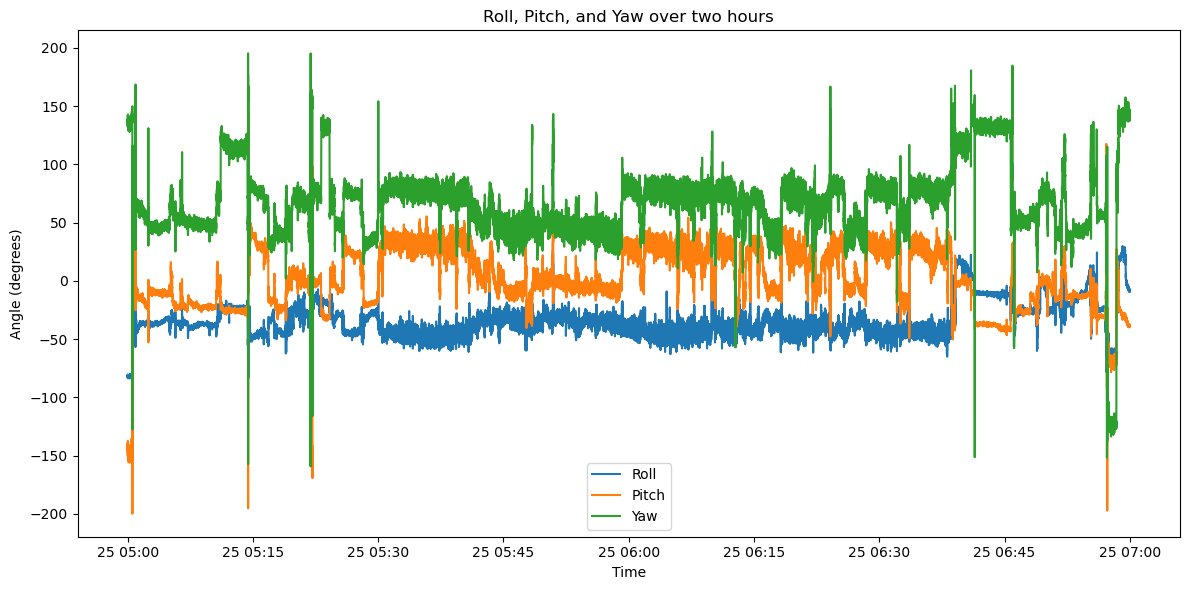

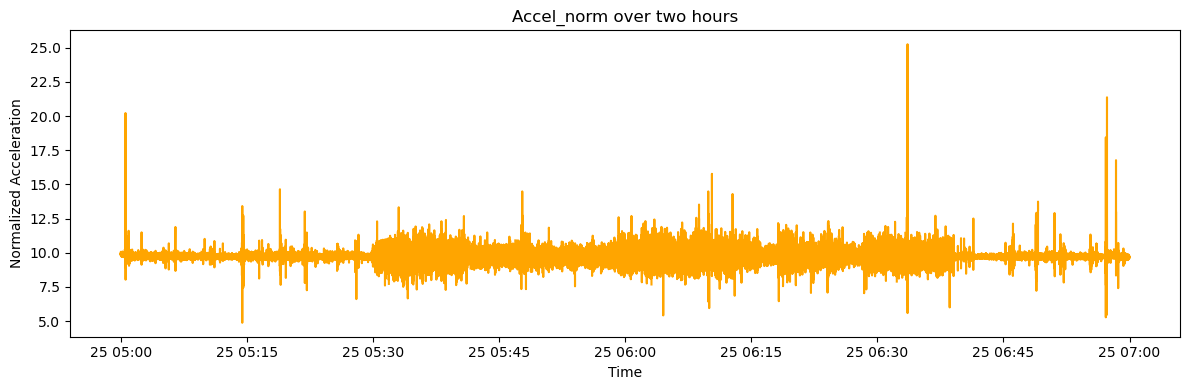

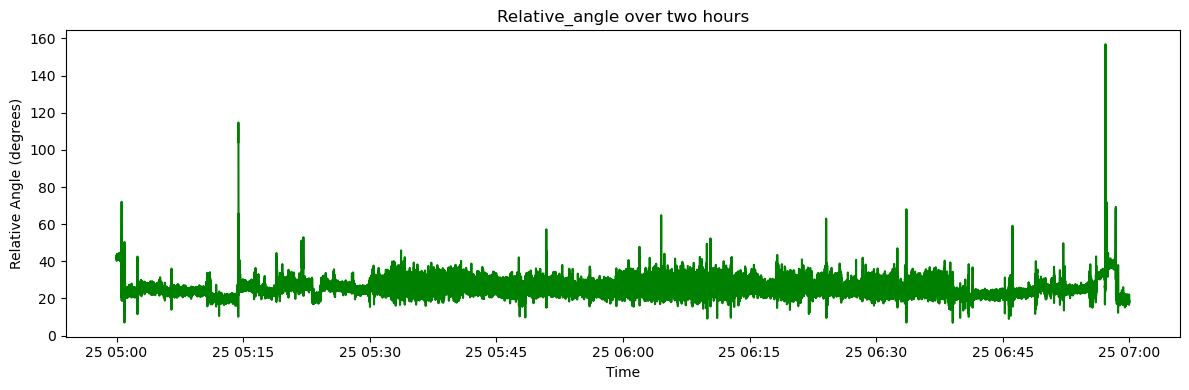

In [ ]:


# Charger le CSV
file_path = r"C:\Users\rouat\Desktop\MMcows\Datasets\sensor_data\sensor_data\sub_data\head_direction\T01\T01_0725.csv"
df = pd.read_csv(file_path)

df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')

# --- Filtrer sur une période de deux heures ---
start_time = df['datetime'].min()
end_time = start_time + pd.Timedelta(hours=2)
df_small = df[(df['datetime'] >= start_time) & (df['datetime'] <= end_time)]

# --- Plot 1: roll, pitch, yaw ---
plt.figure(figsize=(12, 6))
plt.plot(df_small['datetime'], df_small['roll'], label='Roll')
plt.plot(df_small['datetime'], df_small['pitch'], label='Pitch')
plt.plot(df_small['datetime'], df_small['yaw'], label='Yaw')
plt.title('Roll, Pitch, and Yaw over two hours')
plt.xlabel('Time')
plt.ylabel('Angle (degrees)')
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot 2: accel_norm ---
plt.figure(figsize=(12, 4))
plt.plot(df_small['datetime'], df_small['accel_norm'], color='orange')
plt.title('Accel_norm over two hours')
plt.xlabel('Time')
plt.ylabel('Normalized Acceleration')
plt.tight_layout()
plt.show()

# --- Plot 3: relative_angle ---
plt.figure(figsize=(12, 4))
plt.plot(df_small['datetime'], df_small['relative_angle'], color='green')
plt.title('Relative_angle over two hours')
plt.xlabel('Time')
plt.ylabel('Relative Angle (degrees)')
plt.tight_layout()
plt.show()


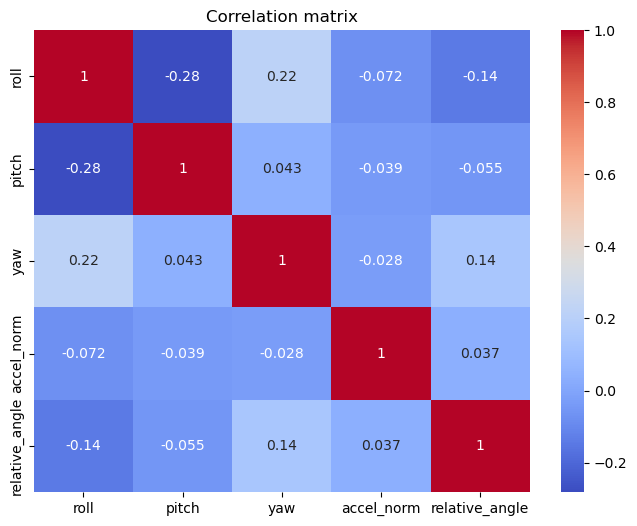

In [48]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df[['roll', 'pitch', 'yaw', 'accel_norm', 'relative_angle']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()


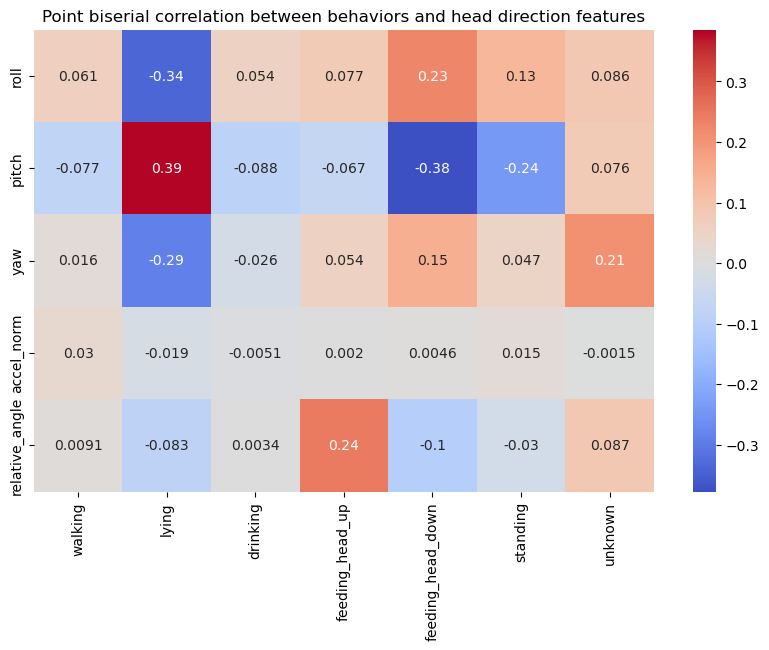

In [ ]:
from scipy.stats import pointbiserialr
import seaborn as sns
import matplotlib.pyplot as plt

df_final_clean = df_final.replace([float('inf'), float('-inf')], pd.NA).dropna()

continuous_features = ['roll', 'pitch', 'yaw', 'accel_norm', 'relative_angle']
target_columns = ['walking', 'lying', 'drinking', 'feeding_head_up',
                  'feeding_head_down', 'standing', 'unknown']

#  Calculer la corrélation point biserial
corr_dict = {}
for target in target_columns:
    corr_values = []
    for feature in continuous_features:
        corr, _ = pointbiserialr(df_final_clean[target], df_final_clean[feature])
        corr_values.append(corr)
    corr_dict[target] = corr_values

corr_df = pd.DataFrame(corr_dict, index=continuous_features)

#  Afficher la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0)
plt.title('Point biserial correlation between behaviors and head direction features')
plt.show()


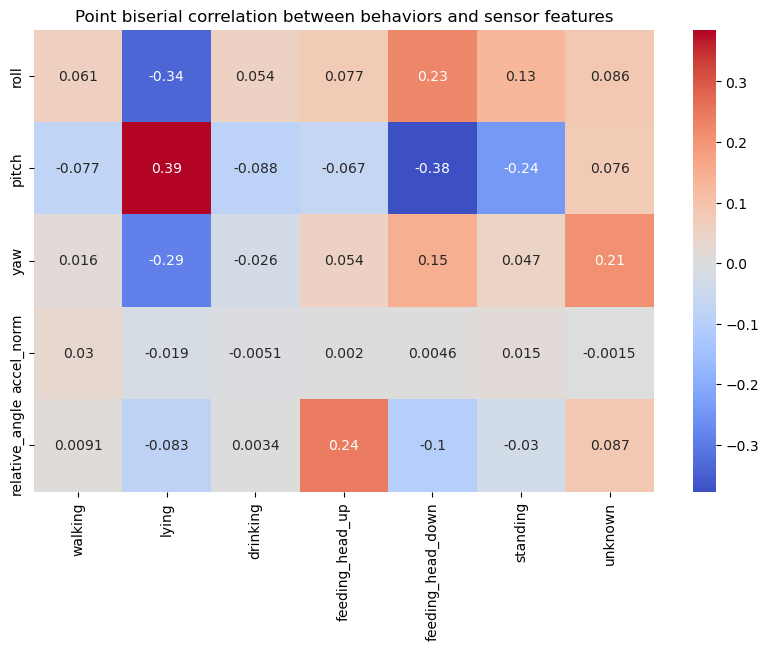

In [ ]:
from scipy.stats import pointbiserialr
import seaborn as sns
import matplotlib.pyplot as plt


cols_to_check = ['roll', 'pitch', 'yaw', 'accel_norm', 'relative_angle',
                 'walking', 'lying', 'drinking', 'feeding_head_up',
                 'feeding_head_down', 'standing', 'unknown']


#  Définir les colonnes continues et target
continuous_features = ['roll', 'pitch', 'yaw', 'accel_norm', 'relative_angle']
target_columns = ['walking', 'lying', 'drinking', 'feeding_head_up',
                  'feeding_head_down', 'standing', 'unknown']

#  Calculer la corrélation point biserial
corr_dict = {}
for target in target_columns:
    corr_values = []
    for feature in continuous_features:
        corr, _ = pointbiserialr(df_final_clean[target], df_final_clean[feature])
        corr_values.append(corr)
    corr_dict[target] = corr_values

corr_df = pd.DataFrame(corr_dict, index=continuous_features)

#  Afficher la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0)
plt.title('Point biserial correlation between behaviors and sensor features')
plt.show()
